In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.testutils import assert_array_almost_equal

In [3]:
# Criando um dataframe com registros ficticios
idades = np.random.randint(20, 60, 20) #  idades aleatórias entre 20 e 60
salarios = idades * np.random.randint(80, 120, 20) # salários relacionados com a idade
pontuacoes = salarios * np.random.uniform(0.5, 1.5, 20) # pontuações relacionadas ao salário
profissoes = ['Engenheiro', 'Professor', 'Médico', 'Advogado', 'Designer', 'Analista', 'Gerente', 'Programador']

# Gerando o DataFrame
dados = {
    'idade': idades,
    'salario': salarios,
    'pontuacao': pontuacoes.round(2) # arredondando as pontuações para 2 casas decimais
}

df = pd.DataFrame(dados)
df['Profissão'] = np.random.choice(profissoes, size = len(df))
df.head(10) # Exibindo as primeiras 10 linhas do novo data frame

,idade,salario,pontuacao,Profissão
0,59,5664,4408.90,Médico
1,25,2425,2310.21,Médico
2,30,2790,3439.06,Designer
3,32,2624,3555.80,Médico
4,26,3016,3891.32,Analista
5,50,4850,7198.26,Designer
6,58,5626,3311.19,Professor
7,55,5775,3405.65,Advogado
8,49,4508,6092.49,Engenheiro
9,45,4185,5033.59,Professor


# 1- Gráfico de Barras

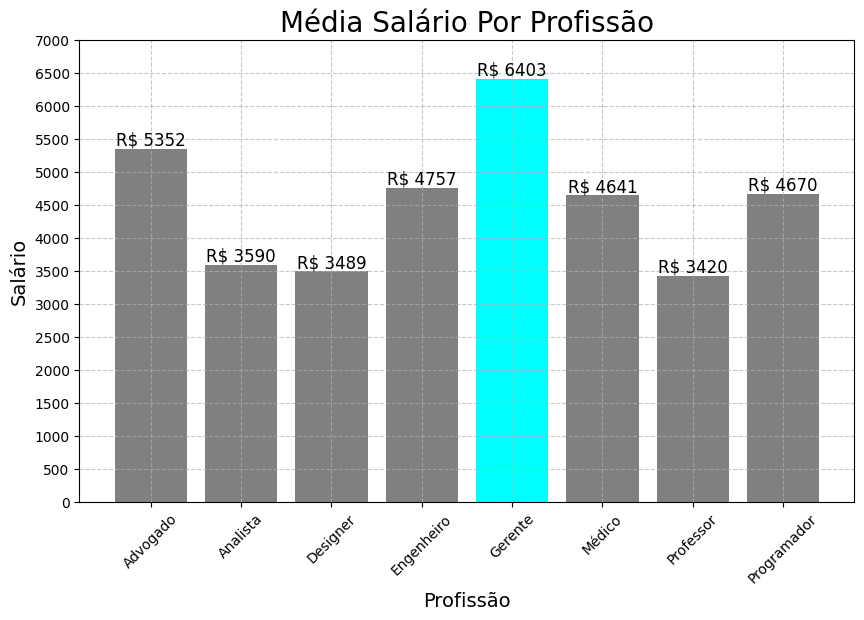

In [45]:
# Agrupando os dados no DataFrame por profissão e calculando a média do salário de cada profissão
salario_por_profissao = df.groupby('Profissão')['salario'].mean()

plt.figure(figsize = (10, 6))

# DESTACANDO A COR DE UMA COLUNA
cor_destaque = "aqua"
cor_padrao = "gray"
indice_max = salario_por_profissao.argmax() # retorna o número do indice com o valor máximo do gráfico
cor = [cor_destaque if i == indice_max else cor_padrao for i in range(len(salario_por_profissao))]

grafico = plt.bar(range(len(salario_por_profissao)), salario_por_profissao, color = cor)

# PERSONALIZANDO
# Definindo titulo
plt.title('Média Salário Por Profissão', fontsize = 20)

# Definindo o titulo do eixo X e Y
plt.xlabel('Profissão', fontsize = 14)
plt.ylabel('Salário', fontsize = 14)

# Adicionando rótulos de dados --> rápido
# plt.bar_label(grafico, fmt = 'R$ %.0f')

# Rótulo de dados
for i, valorY in enumerate(salario_por_profissao):
    plt.text(
        i,
        valorY,
        f'R$ {round(valorY)}',
        ha = 'center',
        va = 'bottom',
        fontsize = 12
    )

# Adicionando e rotacionando o texto do eixo X
plt.xticks(range(len(salario_por_profissao)), salario_por_profissao.index, rotation = 45)

# Ajustando o eixo Y, explicação mais abaixo
plt.yticks(range(0, 7500, 500))

# Adicionando grades ao gráfico com linha tracejada e transparência de 70%
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.show()




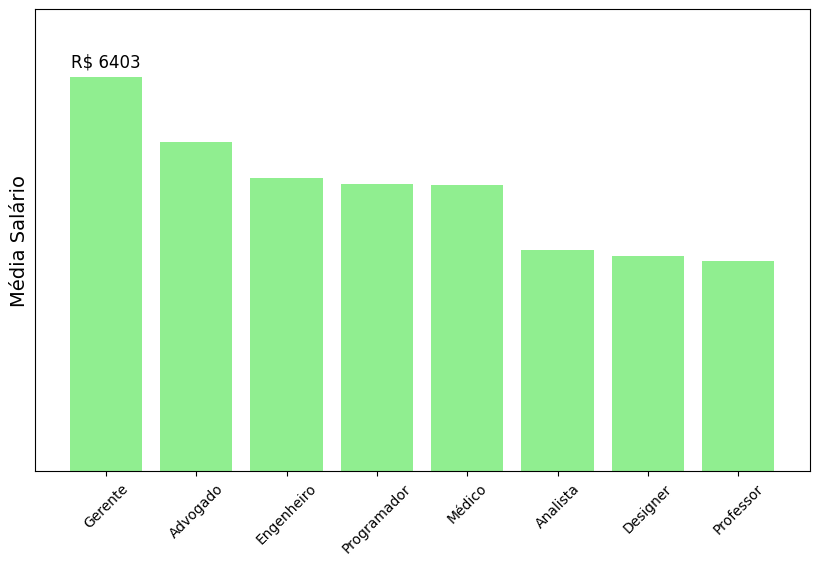

In [62]:
# CALCULANDO A MÉDIA DE SALÁRIO POR PROFISSÃO
salario_por_profissao = df.groupby('Profissão')['salario'].mean()

salario_por_profissao = salario_por_profissao.sort_values(ascending = False)

# CRIANDO O ESPAÇO DO GRÁFICO
fig, ax = plt.subplots(figsize = (10, 6))

# PLOTANDO O GRÁFICO
barras = ax.bar(salario_por_profissao.index, salario_por_profissao, color = 'lightgreen')

# RÓTULO DE DADOS ---> EXIBINDO APENAS UMA COLUNA
indice_max = salario_por_profissao.argmax() # retorna o indice com o valor máximo
barra = barras[indice_max]
altura = barra.get_height()
ax.text(
    barra.get_x() + barra.get_width() / 2,
    altura + 100,
    f'R$ {round(altura)}',
    ha = 'center',
    va = 'bottom',
    fontsize = 12
)

# EXPLICAÇÃO DO CÓDIGO
# "plt.text(line.get_x() + line.get_width() / 2" --> calcula a posição horizontal do texto no centro da linha
# "line.get_height()" --> obtém a altura da linha
# "round(line.get_height(), 2)" --> arredonda o valor da altura da linha para duas casas decimais
# "ha = 'center'" --> alinha horizontalmente no centro da linha de cada idade
# "va = 'bottom'" --> alinha o texto verticalmente na parte inferior da linha de cada idade

# AJUSTES EIXO Y
ax.set_yticks(range(0, 8000, 500))
ax.set_yticks([])
plt.xticks(rotation = 45)
plt.ylabel("Média Salário", fontsize = 14)
plt.show()


## 2- Gráfico de Linhas

Text(0.5, 1.0, 'Evolução Idade x Score')

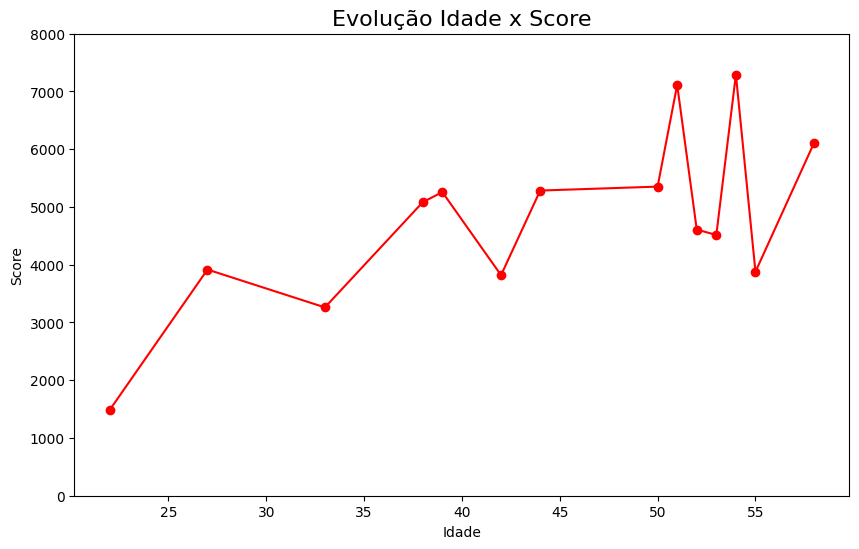

In [65]:
# Calculando a média do SCORE por IDADE
media_score_idade = df.groupby('idade')['pontuacao'].mean()

# Criando a figura do gráfico
plt.figure(figsize = (10,6))

# Plotando o gráfico
plt.plot(media_score_idade.index, media_score_idade, color = 'red', marker = 'o')

# PERSONALIZANDO \
# EIXOS
plt.xlabel('Idade', fontsize = 10)
plt.ylabel('Score', fontsize = 10)
plt.yticks(range(0, 9000, 1000))

# CORPO PRINCIPAL
plt.title('Evolução Idade x Score', fontsize = 16)




Dificultando ...

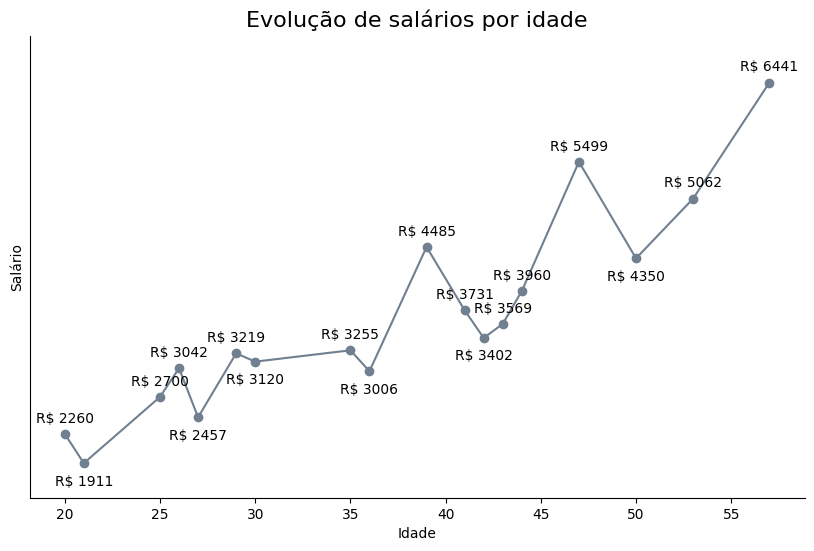

In [142]:
# Tirando a média de salário por idade e agrupando pela idade
media_salario_por_idade = df.groupby('idade')['salario'].mean()

# Plotando o gráfico de linhas
fig, ax = plt.subplots(figsize = (10, 6))
linhas = ax.plot(media_salario_por_idade.index, media_salario_por_idade, color = 'slategrey', marker = 'o')

# Adicionando os rótulos de dados --> FORMA 01
# for x, y in zip(media_salario_por_idade.index, media_salario_por_idade):
#     ax.text(x, y + 50, f'R$ {round(y)}', ha = 'center', va = 'bottom', fontsize = 10)
# É possível andar a posição dos rótulos subtraindo ou adicionando valores em X (Vertical) e Y (Horizontal)

# Complicando mais ainda kkkk -- FORMA 02
for i, (x, y) in enumerate(zip(media_salario_por_idade.index, media_salario_por_idade)):
    ajuste_posicao = 0
    if i in [1, 4, 6, 8, 11, 15]:
        ajuste_posicao = -300
    else:
        ajuste_posicao = 100
    ax.text(x, y + ajuste_posicao, f'R$ {round(y)}',ha = 'center', va = 'bottom', fontsize = 10)

# EXPLICAÇÃO
# "enumerate(zip(media_salario_por_idade.index, media_salario_por_idade)" --> zip cria "pares" das variáveis para plotar e ENUMERATE cria um índice desses pares

# CUSTOMIZANDO
plt.title("Evolução de salários por idade", fontsize = 16)
plt.xlabel("Idade", fontsize = 10)
plt.ylabel("Salário", fontsize = 10)

# Removendo os eixos do gráfico para deixar mais clean
#ax.get_yaxis().set_visible(False) --> OCULTA O EIXO Y
# ax.get_xaxis().set_visible(False) --> OCULTA O EIXO X

# AJUSTANDO O EIXO Y --> MÍNIMO (1500)  MÁXIMO (7500) CORTES (500)
ax.set_yticks(range(1500, 7500, 500))

# REMOVE OS VALORES DO EIXO Y E MANTÉM O RÓTULO --> FUNCIONA COM X TAMBÉM
ax.set_yticks([])

# Removendo as bordas do gráfico (“top”, “right”, “left”, “bottom”)
ax.spines[['top', 'right']].set_visible(False)

plt.show()


# 3- Gráficos de Linhas e Colunas

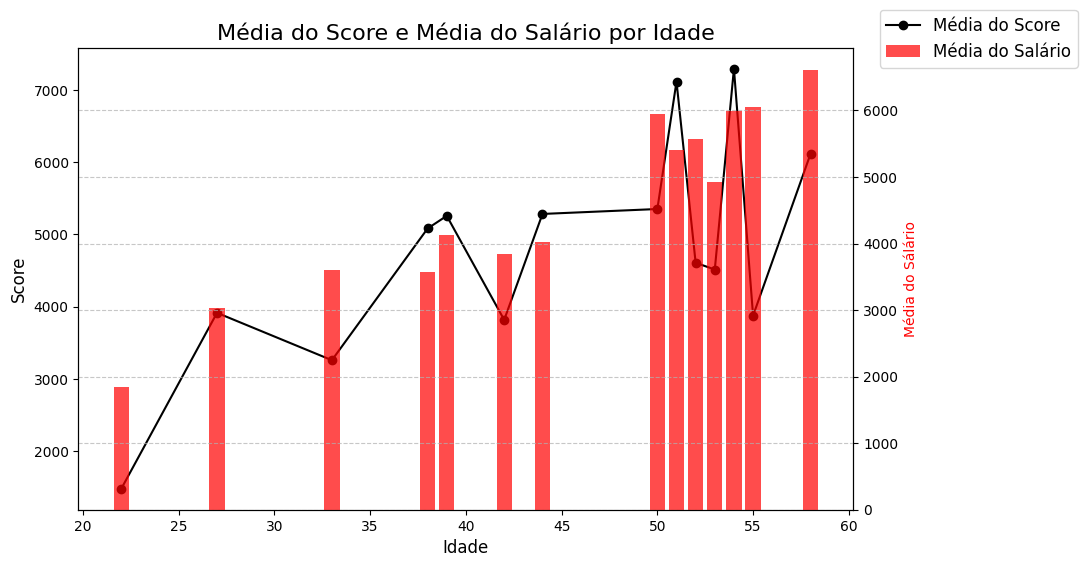

In [125]:
# Calculando a média do salário para cada idade e ordenando a idade em ordem crescente
media_salario_idade = df.groupby('idade')['salario'].mean().sort_index()

# Calculando a média do score por idade
media_score_idade = df.groupby('idade')['pontuacao'].mean()

# Criando a figura do gráfico
fig, ax1 = plt.subplots(figsize = (10, 6))

# Criando o gráfico de linha
ax1.plot(media_score_idade.index, media_score_idade, marker = 'o', color = 'black', label = 'Média do Score')
ax1.set_xlabel('Idade', fontsize = 12)
ax1.set_ylabel('Score', fontsize = 12)

# Criando o gráfico de barras
ax2 = ax1.twinx() # Criando o eixo Y secundário (Twiny para o X)
ax2.bar(media_salario_idade.index, media_salario_idade, color = 'red', alpha = 0.7, label = 'Média do Salário')
ax2.set_ylabel('Média do Sálário', color = 'red')

# LEGENDAS
# Obtendo as linhas e o rótulo da legenda do eixo y primário
lines1, labels1 = ax1.get_legend_handles_labels()

# Obtendo as linhas e rótulos da  legenda do eixos y secundário
lines2, labels2= ax2.get_legend_handles_labels()

# Criando a legenda, é necessário concatenar os rótulos (labels) e especificar a posição da legenda com o parâmetro loc
ax1.legend(lines1 + lines2, labels1 + labels2, loc = 'upper right', bbox_to_anchor = (1.3, 1.1), fontsize = 12)
                      # bbox_to_anchor serve para posicionar a legenda manualmente -    H | V
plt.title("Média do Score e Média do Salário por Idade", fontsize = 16)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()


Trazendo rótulos de dados

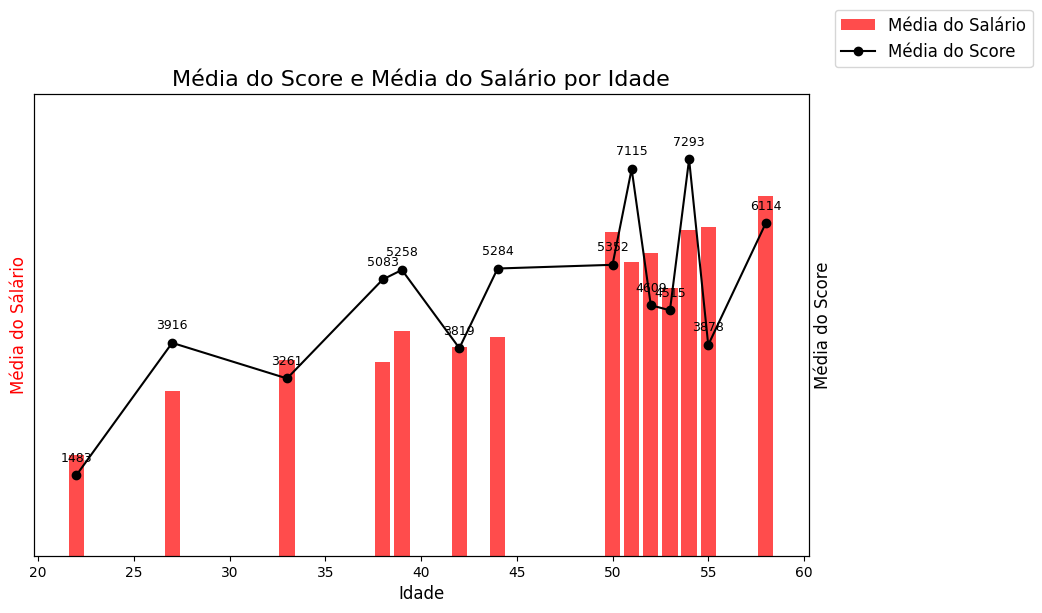

In [214]:
# CONFIGURAÇÃO
media_salario_idade = df.groupby('idade')['salario'].mean().sort_index()
media_score_idade = df.groupby('idade')['pontuacao'].mean()

# FIGURA DOS GRÁFICOS
fig, ax1 = plt.subplots(figsize = (10, 6))

# GRÁFICO DE BARRAS
ax1.bar(media_salario_idade.index, media_salario_idade, color = 'red', alpha = 0.7, label = 'Média do Salário')
ax1.set_xlabel('Idade', fontsize = 12)
ax1.set_ylabel('Média do Sálário', fontsize = 12,  color = 'red')
ax1.set_yticks(range(0, 9000, 500))
ax1.set_yticks([])

# GRÁFICO DE LINHAS
ax2 = ax1.twinx()
ax2.plot(media_score_idade.index, media_score_idade, marker = 'o', color = 'black', label = 'Média do Score')
ax2.set_ylabel('Média do Score', fontsize = 12)
ax2.set_yticks(range(0, 9000, 500))
ax2.set_yticks([])


# RÓTULOS DE DADOS
# GRÁFICO DE BARRAS
# for i, (x, y) in enumerate(zip(media_salario_idade.index, media_salario_idade)):
#     ax2.text(
#         x - 0.2,
#         y + 100,
#         f'R$ {round(y)}',
#         ha = 'center',
#         va = 'bottom',
#         fontsize = 8
#     )

# GRÁFICO DE LINHAS
for i, (x, y) in enumerate(zip(media_score_idade.index, media_score_idade)):
    ax2.text(
        x,
        y + 200,
        f'{round(y)}',
        ha = 'center',
        va = 'bottom',
        fontsize = 9
    )

# LEGENDA
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2= ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc = 'upper right', bbox_to_anchor = (1.3, 1.2), fontsize = 12)

# PERSONALIZAÇÃO
plt.title("Média do Score e Média do Salário por Idade", fontsize = 16)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

# 4- Gráfico de Dispersão

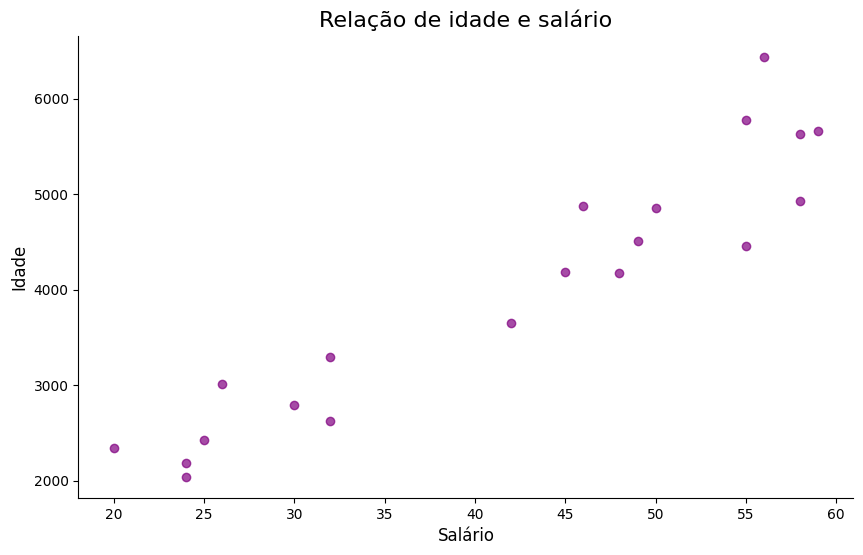

In [37]:
# Área o gráfico
plt.figure(figsize = (10, 6))

# Plotando o gráfico de dispersão
plt.scatter(df['idade'], df['salario'], color = 'purple', alpha = 0.7)

# Customizando
plt.title("Relação de idade e salário", fontsize = 16)
plt.xlabel("Salário", fontsize = 12)
plt.ylabel("Idade", fontsize = 12)

# Desabilitando as linhas do topo e da direita do gráfico, não foi possível fazer com o comando plt.gca().spines[['top'], ['right']].set_visible(False)
for spine in ['top', 'right']: # tem que ser escrito com spine, não funciona com i
    plt.gca().spines[spine].set_visible(False)

plt.show()

# 5- Boxplot

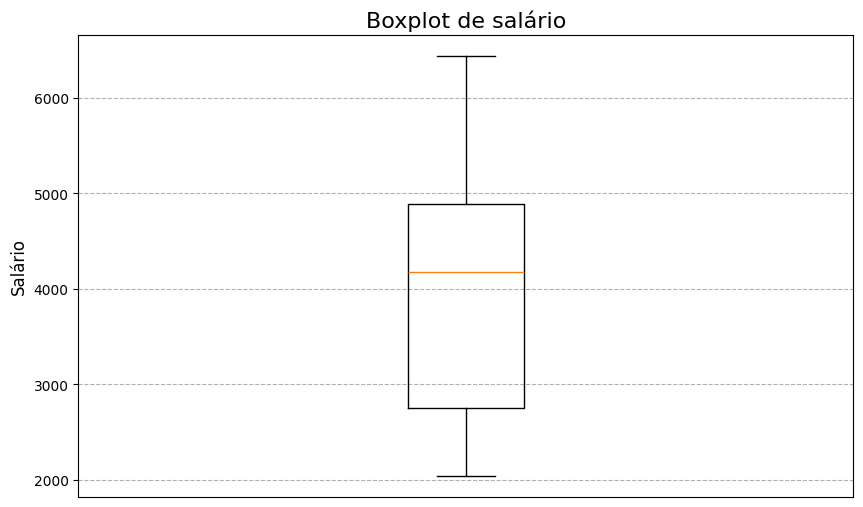

In [34]:
# Criando o boxplot
plt.figure(figsize = (10, 6))
plt.boxplot(df['salario'])

# Customizando
plt.title("Boxplot de salário", fontsize = 16)
plt.ylabel("Salário", fontsize = 12)
plt.grid(True, linestyle = '--')
plt.xticks([])

plt.show()

## Boxplot do Score e do Salário

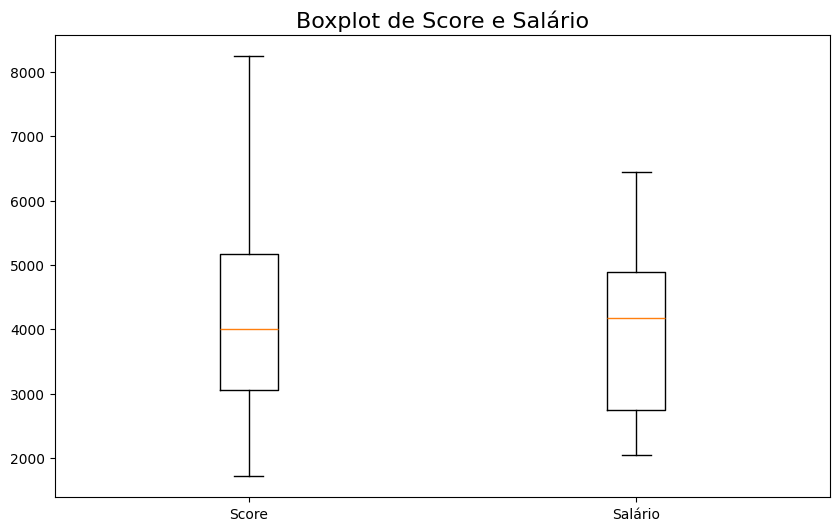

In [52]:
# Criando a figura
plt.figure(figsize = (10, 6))
plt.boxplot([df['pontuacao'], df['salario']], tick_labels = ['Score', 'Salário'])

plt.title("Boxplot de Score e Salário", fontsize = 16)
plt.show()

## Boxplot C/ Outliers

In [ ]:
# CRIANDO UM DATAFRAME
salarios = np.random.randint(2000, 10000, 18)
outliers = [18000, -3000]

# Concatenando as listas
salarios_com_outliers = np.concatenate((salarios, outliers))
df_salarios = pd.DataFrame({'Salario': salarios_com_outliers})

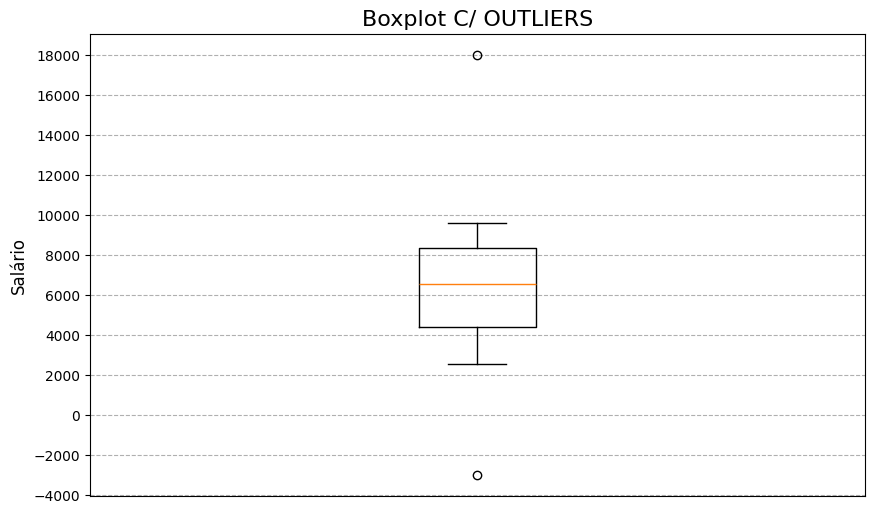

In [51]:
# CRIANDO O GRÁFICO
plt.figure(figsize = (10, 6))
plt.boxplot(df_salarios['Salario'])

# CUSTOMIZANDO
plt.title("Boxplot C/ OUTLIERS", fontsize = 16)
plt.grid(True, linestyle = '--')
plt.ylabel("Salário", fontsize = 12)
plt.yticks(range(-4000, 20000, 2000))
plt.xticks([])

plt.show()